In [1]:
%pip install --upgrade --quiet google-genai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.1/43.1 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.6/222.6 kB 7.8 MB/s eta 0:00:00


In [1]:
import os

from IPython.display import HTML, Markdown, display
from google import genai
from google.genai.types import GenerateContentConfig, Tool, ToolCodeExecution, Image

In [2]:
PROJECT_ID = os.environ.get("GOOGLE_CLOUD_PROJECT")
LOCATION = os.environ.get("GOOGLE_CLOUD_REGION", "us-central1")

client = genai.Client(vertexai=True, project=PROJECT_ID, location=LOCATION)

In [3]:
code_execution_tool = Tool(code_execution=ToolCodeExecution())

In [4]:
PROMPT = """
What is the sum of the first 50 prime numbers?
Generate and run code for the calculation.
"""

In [5]:
response = client.models.generate_content(
    model="gemini-2.0-flash-001",
    contents=PROMPT,
    config=GenerateContentConfig(
        tools=[code_execution_tool],
        temperature=0,
    ),
)

In [6]:
for part in response.candidates[0].content.parts:
    if part.executable_code:
        print(part.executable_code.code)

def is_prime(n):
    if n <= 1:
        return False
    if n <= 3:
        return True
    if n % 2 == 0 or n % 3 == 0:
        return False
    i = 5
    while i * i <= n:
        if n % i == 0 or n % (i + 2) == 0:
            return False
        i += 6
    return True

primes = []
num = 2
while len(primes) < 50:
    if is_prime(num):
        primes.append(num)
    num += 1

sum_of_primes = sum(primes)
print(f'{sum_of_primes=}')



In [7]:
for part in response.candidates[0].content.parts:
    if part.code_execution_result:
        display(Markdown(f"`{part.code_execution_result.output}`"))
        print("\nOutcome:", part.code_execution_result.outcome)

`sum_of_primes=5117
`


Outcome: Outcome.OUTCOME_OK


In [8]:
def handle_response(response):
    for part in response.candidates[0].content.parts:
        # For text responses
        if part.text:
            display(Markdown(part.text))

        # For generated inline image responses
        if part.inline_data:
            if part.inline_data.mime_type.startswith("image"):
                Image(image_bytes = part.inline_data.data).show()

        # For executable code responses
        if part.executable_code:
            print(part.executable_code.code)
        if part.code_execution_result:
            display(Markdown(f"`{part.code_execution_result.output}`"))
            print("\nOutcome:\n")
            display(Markdown(part.code_execution_result.outcome))

In [9]:
code_execution_tool = Tool(code_execution=ToolCodeExecution())

chat = client.chats.create(
    model="gemini-2.0-flash-001",
    config=GenerateContentConfig(
        tools=[code_execution_tool],
        temperature=0,
        system_instruction="Use the code execution Tool when asked to generate data, code or plots."
    ),
)

In [10]:
PROMPT = """Create sample time series data of temperature vs. time in a test furnace.
Add noise to the data. Output a sample of 10 data points from the time series data."""

response = chat.send_message(PROMPT)

In [11]:
handle_response(response)

Okay, I can create sample time series data of temperature vs. time in a test furnace and add noise to it. Here's how I'll approach this:

1.  **Define Time Range:** I'll set a time range for the data, say from 0 to 100 minutes.
2.  **Generate Time Points:** I'll create a series of time points within that range.
3.  **Define a Temperature Function:** I'll define a function that represents the temperature profile of the furnace over time. This could be a simple linear increase, a more complex curve, or a combination of both.
4.  **Calculate Temperature Values:** I'll calculate the temperature values at each time point using the temperature function.
5.  **Add Noise:** I'll add random noise to the temperature values to simulate real-world fluctuations.
6.  **Create a Pandas DataFrame:** I'll store the time and temperature data in a Pandas DataFrame for easy manipulation and analysis.
7.  **Output Sample:** I'll output a sample of 10 data points from the DataFrame.

Here's the Python code to do this:



import pandas as pd
import numpy as np

# Define time range
time_start = 0
time_end = 100
num_points = 100

# Generate time points
time = np.linspace(time_start, time_end, num_points)

# Define a temperature function (example: linear increase with some oscillation)
def temperature_function(t):
  return 20 + 0.5 * t + 5 * np.sin(t / 10)

# Calculate temperature values
temperature = temperature_function(time)

# Add noise
noise_level = 2  # Adjust for desired noise level
noise = np.random.normal(0, noise_level, num_points)
temperature_noisy = temperature + noise

# Create a Pandas DataFrame
data = pd.DataFrame({'Time': time, 'Temperature': temperature_noisy})

# Output a sample of 10 data points
sample = data.sample(10)
print(sample)



`         Time  Temperature
27  27.272727    35.780239
86  86.868687    65.081254
66  66.666667    57.267433
68  68.686869    58.793906
50  50.505051    41.330804
56  56.565657    44.184241
30  30.303030    32.105456
35  35.353535    36.987535
64  64.646465    54.548542
76  76.767677    59.587661
`


Outcome:



OUTCOME_OK

The code generated a Pandas DataFrame containing time and temperature data with added noise. The temperature data is based on a linear function with sinusoidal oscillations, and Gaussian noise was added to simulate real-world fluctuations. Finally, a random sample of 10 data points from the DataFrame was printed. You can adjust the `noise_level` variable to control the amount of noise added to the data. You can also modify the `temperature_function` to create different temperature profiles.


In [12]:
PROMPT = """Now add a data series that smooths the data using an appropriate method"""

response = chat.send_message(PROMPT)

In [13]:
handle_response(response)

Okay, I can add a data series to the DataFrame that smooths the noisy temperature data. A common and effective method for smoothing time series data is using a moving average. I'll implement a simple moving average and add it as a new column to the DataFrame.

Here's the updated code:



import pandas as pd
import numpy as np

# Define time range
time_start = 0
time_end = 100
num_points = 100

# Generate time points
time = np.linspace(time_start, time_end, num_points)

# Define a temperature function (example: linear increase with some oscillation)
def temperature_function(t):
  return 20 + 0.5 * t + 5 * np.sin(t / 10)

# Calculate temperature values
temperature = temperature_function(time)

# Add noise
noise_level = 2  # Adjust for desired noise level
noise = np.random.normal(0, noise_level, num_points)
temperature_noisy = temperature + noise

# Create a Pandas DataFrame
data = pd.DataFrame({'Time': time, 'Temperature': temperature_noisy})

# Add a moving average to smooth the data
window_size = 5  # Adjust for desired smoothing level
data['Temperature_Smooth'] = data['Temperature'].rolling(window=window_size, center=True).mean()

# Output a sample of 10 data points
sample = data.sample(10)
print(sample)



`         Time  Temperature  Temperature_Smooth
39  39.393939    34.438945           35.984418
91  91.919192    66.196904           66.162074
56  56.565657    44.694602           44.576156
20  20.202020    33.384540           34.203149
28  28.282828    36.913209           34.668214
37  37.373737    35.719769           36.389121
92  92.929293    68.012363           66.688739
82  82.828283    67.044741           65.000321
74  74.747475    64.831076           62.698055
81  81.818182    63.991616           65.324148
`


Outcome:



OUTCOME_OK

The code now calculates a moving average of the noisy temperature data using a window size of 5. The `rolling()` method with `center=True` calculates the moving average with the current data point at the center of the window. The resulting smoothed data is stored in a new column called 'Temperature\_Smooth' in the DataFrame. A sample of 10 data points, including the smoothed temperature, is then printed. You can adjust the `window_size` variable to control the degree of smoothing. A larger window size will result in a smoother curve, but it will also lag the original data more.


In [14]:
PROMPT = """Generate code to plot the noisy data and smoothed data."""

response = chat.send_message(PROMPT)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define time range
time_start = 0
time_end = 100
num_points = 100

# Generate time points
time = np.linspace(time_start, time_end, num_points)

# Define a temperature function (example: linear increase with some oscillation)
def temperature_function(t):
  return 20 + 0.5 * t + 5 * np.sin(t / 10)

# Calculate temperature values
temperature = temperature_function(time)

# Add noise
noise_level = 2  # Adjust for desired noise level
noise = np.random.normal(0, noise_level, num_points)
temperature_noisy = temperature + noise

# Create a Pandas DataFrame
data = pd.DataFrame({'Time': time, 'Temperature': temperature_noisy})

# Add a moving average to smooth the data
window_size = 5  # Adjust for desired smoothing level
data['Temperature_Smooth'] = data['Temperature'].rolling(window=window_size, center=True).mean()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['Temperature'], label='Noisy Temper

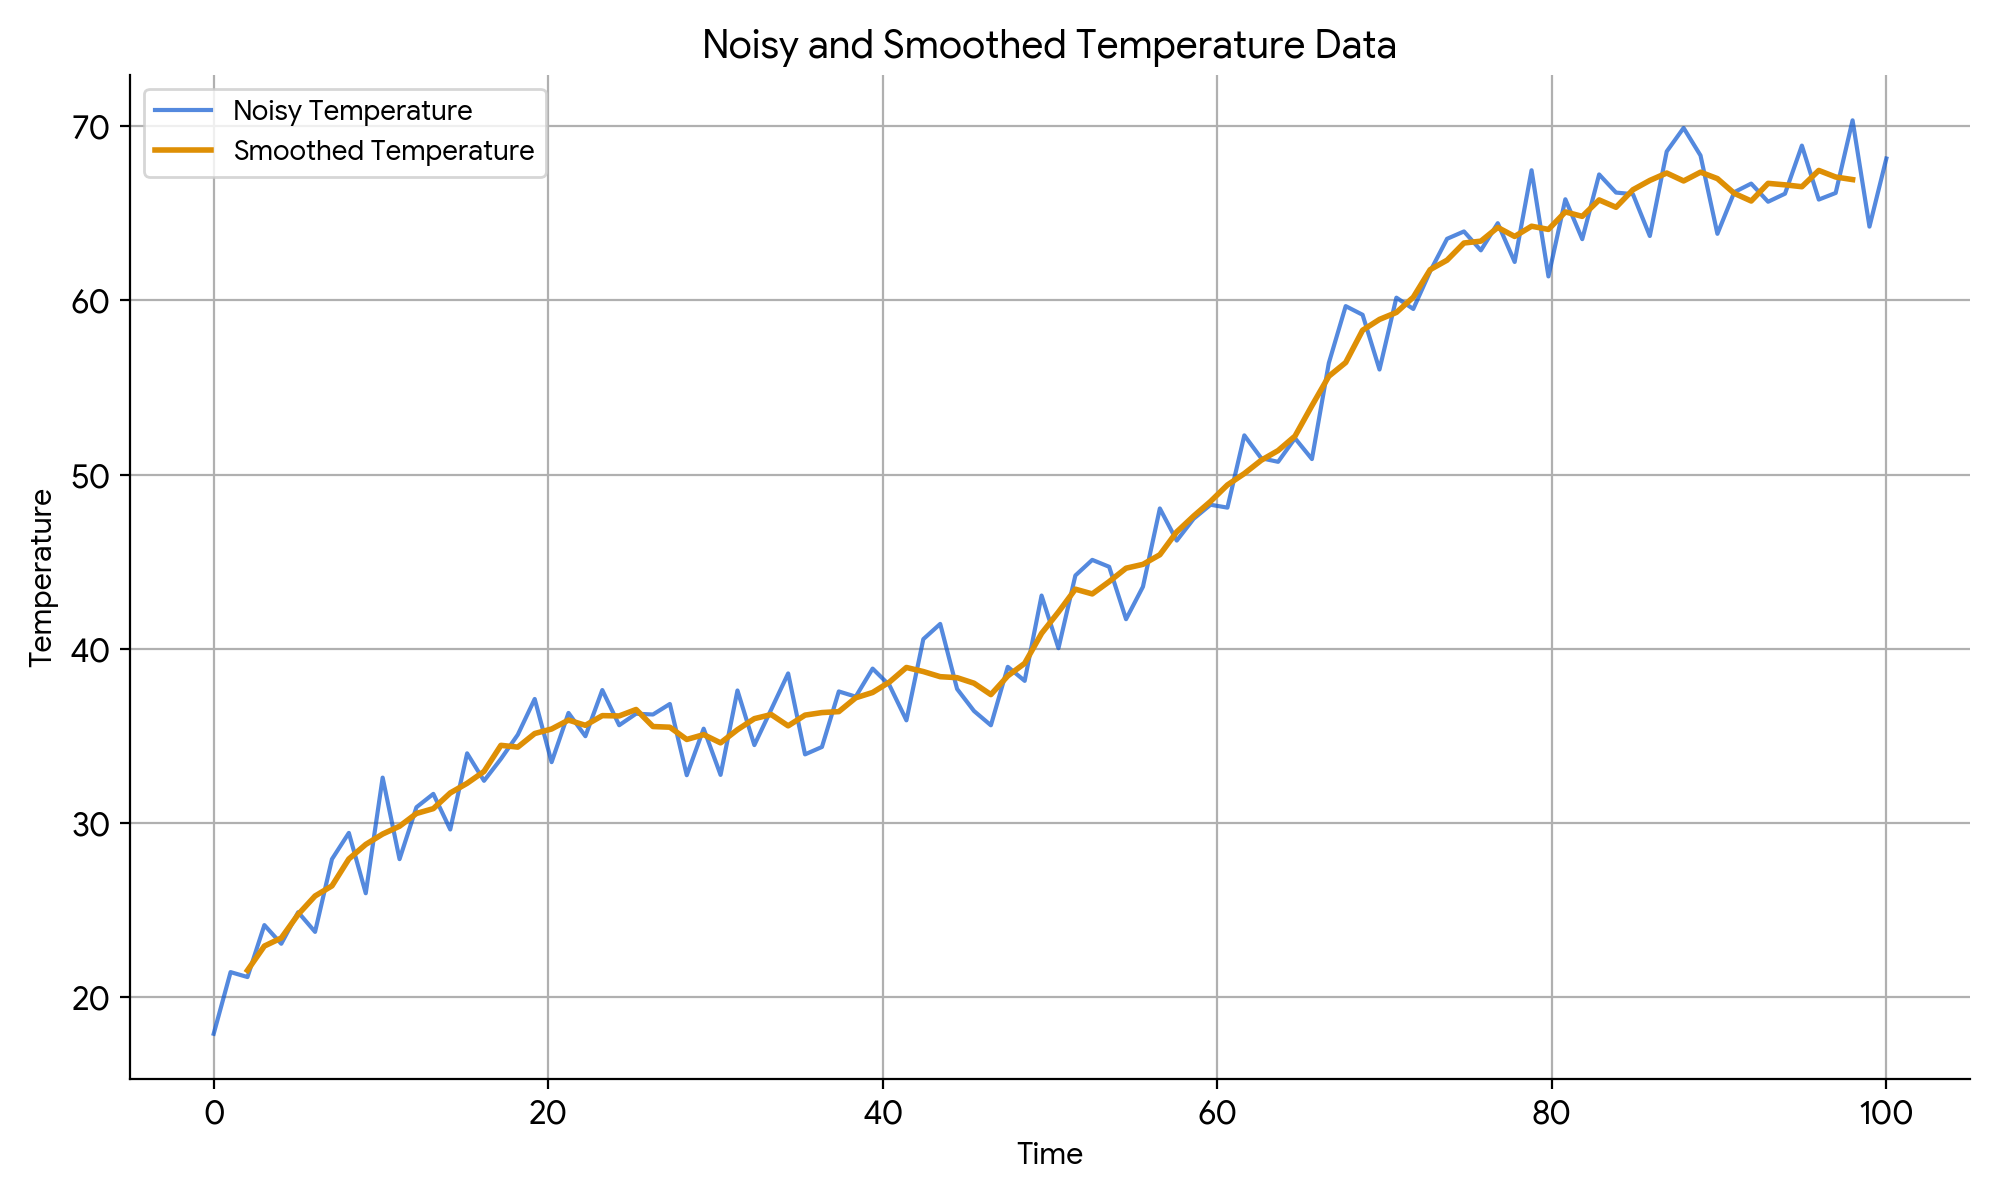

In [15]:
handle_response(response)

In [16]:
PROMPT = "Now generate and output descriptive statistics on the time series data."

response = chat.send_message(PROMPT)
handle_response(response)

import pandas as pd
import numpy as np

# Define time range
time_start = 0
time_end = 100
num_points = 100

# Generate time points
time = np.linspace(time_start, time_end, num_points)

# Define a temperature function (example: linear increase with some oscillation)
def temperature_function(t):
  return 20 + 0.5 * t + 5 * np.sin(t / 10)

# Calculate temperature values
temperature = temperature_function(time)

# Add noise
noise_level = 2  # Adjust for desired noise level
noise = np.random.normal(0, noise_level, num_points)
temperature_noisy = temperature + noise

# Create a Pandas DataFrame
data = pd.DataFrame({'Time': time, 'Temperature': temperature_noisy})

# Add a moving average to smooth the data
window_size = 5  # Adjust for desired smoothing level
data['Temperature_Smooth'] = data['Temperature'].rolling(window=window_size, center=True).mean()

# Generate descriptive statistics
descriptive_stats = data[['Temperature', 'Temperature_Smooth']].describe()
print(descriptive_stats)



`       Temperature  Temperature_Smooth
count   100.000000           96.000000
mean     46.056083           46.119325
std      14.931980           14.413762
min      18.857966           22.179206
25%      34.669900           34.766903
50%      40.778608           40.579966
75%      62.366410           61.689698
max      71.002931           68.855205
`


Outcome:



OUTCOME_OK

The code calculates and prints descriptive statistics for the 'Temperature' (noisy) and 'Temperature\_Smooth' data series. The `describe()` method in Pandas provides statistics such as count, mean, standard deviation, minimum, 25th percentile, 50th percentile (median), 75th percentile, and maximum values for each series. Note that the count for 'Temperature\_Smooth' is less than 'Temperature' because the moving average calculation reduces the number of valid data points at the beginning and end of the series due to the windowing.


In [17]:
code_execution_tool = Tool(code_execution=ToolCodeExecution())

PROMPT = """
Generate a list of 20 random names, then create a new list with just the names
containing the letter 'a', then output the number of names that contain 'a' and
finally show me that new list.
"""

for chunk in client.models.generate_content_stream(
    model="gemini-2.0-flash-001",
    contents=PROMPT,
    config=GenerateContentConfig(
        tools=[code_execution_tool],
        temperature=0,
    ),
):
    for part in chunk.candidates[0].content.parts:
        if part.text:
            display(Markdown("#### Natural language stream"))
            display(Markdown(part.text))
            display(Markdown("---"))
        if part.executable_code:
            display(Markdown("#### Code stream"))
            display(
                Markdown(
                    f"""
```py
{part.executable_code.code}
```
"""
                )
            )
            display(Markdown("---"))
        if part.code_execution_result:
            display(Markdown("#### Code result"))
            display(
                Markdown(
                    f"""
```
{part.code_execution_result.output}
```
"""
                )
            )
            display(Markdown("---"))

#### Natural language stream

Okay, I can

---

#### Natural language stream

 do that. Here's the process:

1.  **Generate 

---

#### Natural language stream

20 random names:** I'll create a list of 20 names

---

#### Natural language stream

. For simplicity, I'll use common English names.
2.  **Filter for names containing 'a':** I'll iterate through the list and

---

#### Natural language stream

 create a new list containing only the names that include the letter 'a' (case-insensitive).
3.  **Count the names:** I'll count the number

---

#### Natural language stream

 of names in the filtered list.
4.  **Output:** I'll print the count and the filtered list.

Here's the code to accomplish this:



---

#### Code stream


```py
import random

names = ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace', 'Henry', 'Ivy', 'Jack', 'Karen', 'Liam', 'Mia', 'Noah', 'Olivia', 'Peter', 'Quinn', 'Ryan', 'Sophia', 'Tom']

names_with_a = [name for name in names if 'a' in name.lower()]

count = len(names_with_a)

print(f"Number of names containing 'a': {count}")
print(f"Names containing 'a': {names_with_a}")

```


---

#### Code result


```
Number of names containing 'a': 13
Names containing 'a': ['Alice', 'Charlie', 'David', 'Frank', 'Grace', 'Jack', 'Karen', 'Liam', 'Mia', 'Noah', 'Olivia', 'Ryan', 'Sophia']

```


---

#### Natural language stream

Here

---

#### Natural language stream

's the output:

*   **Number of names containing 'a':

---

#### Natural language stream

** 13
*   **Names containing 'a':** \['Alice', '

---

#### Natural language stream

Charlie', 'David', 'Frank', 'Grace', 'Jack', 'Karen', 'Liam', 'Mia', 'Noah', 'Olivia', 'Ryan',

---

#### Natural language stream

 'Sophia']


---